In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE 
import plotly.express as px
from yellowbrick.text.tsne import tsne
from yellowbrick.text import umap
from spacy.lang.el.stop_words import STOP_WORDS
mpl.rcParams['figure.dpi'] = 300


In [249]:
df = pd.read_csv('greek_news_articles.csv')
df.dropna(subset = ['summary'], inplace = True)
df.drop_duplicates(subset = ['summary'], inplace = True)

In [212]:
sites = ['kathimerini.gr', 'skai.gr',
         'efsyn.gr', 'left.gr']

query = " clean_url in @sites "

df_ = df.query(query)

In [250]:
vector = TfidfVectorizer(stop_words = STOP_WORDS,
                         use_idf = True,                   
                         ngram_range = (1,1))

x = vector.fit_transform(df['summary'])


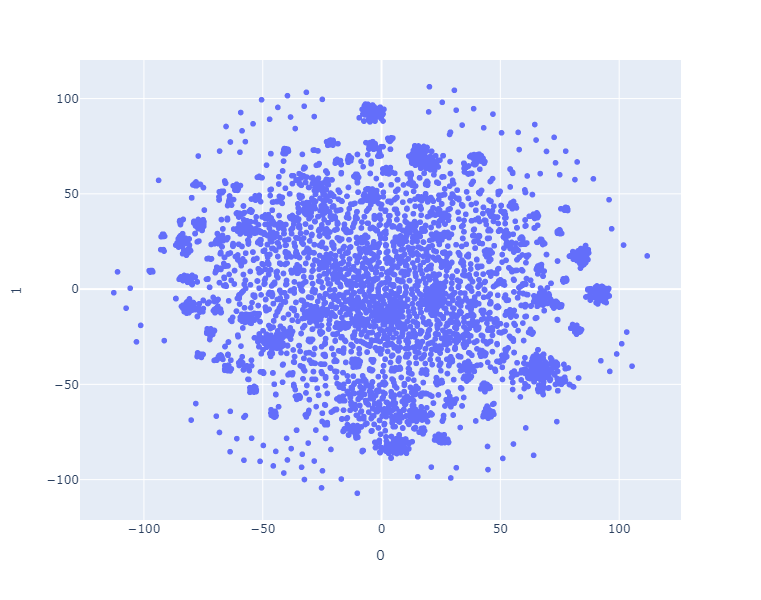

In [252]:
txt = df['summary'].str.wrap(50)
txt = txt.str.replace('\n','<br>')

tsne_ = TSNE(n_components=2, random_state=0)
projections = tsne_.fit_transform(x)

fig = px.scatter(projections,
                 x=0, y=1, #color = df['clean_url'],
                 hover_name = df['clean_url'],
                 hover_data = [df['title']],
                 width = 800, height = 600,
                 )

fig.show()